In [1]:
# import standard modules
import numpy as np
import cv2, glob, pickle
import image_helper as ih
import video_helper as vh

# import matplotlib modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

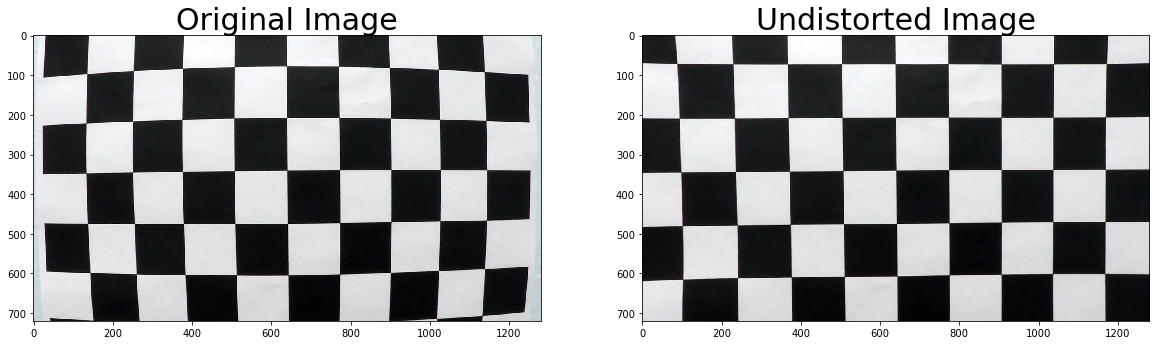

In [2]:
# Test undistortion on an image
img = cv2.imread("./camera_cal/calibration1.jpg")
img_size = (img.shape[1], img.shape[0])

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]
                 
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# undistort the image and save it.
dst = cv2.undistort(img, mtx, dist, None, mtx)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [3]:
# read the test1 image
image = mpimg.imread("test_images/straight_lines1.jpg")

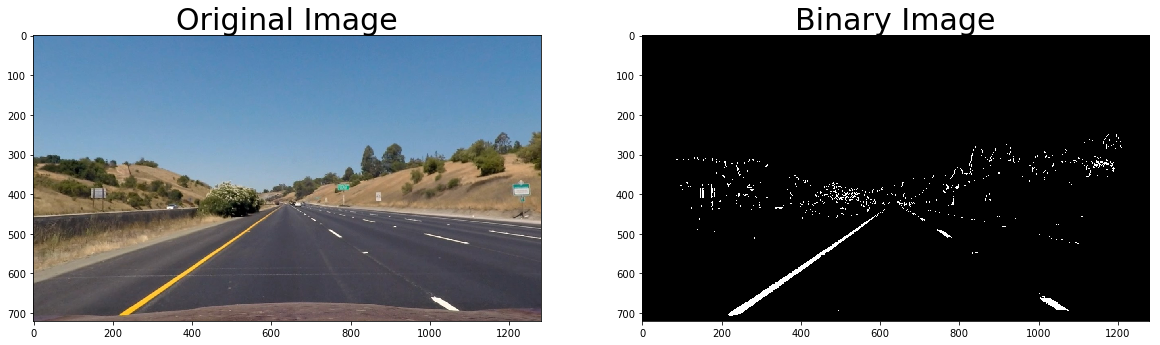

In [4]:
# warp the image after distortion correction
undistort_img = ih.undistort(image, mtx, dist)
#warped, Minv = ih.warp(undistort_img)

# apply the combined threshold
binary_warped = ih.pipeline(undistort_img, (130,255),(50,255),(40,255))
binary_warped = ih.region_of_interest(binary_warped)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(undistort_img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(binary_warped, cmap="gray")
ax2.set_title('Binary Image', fontsize=30)

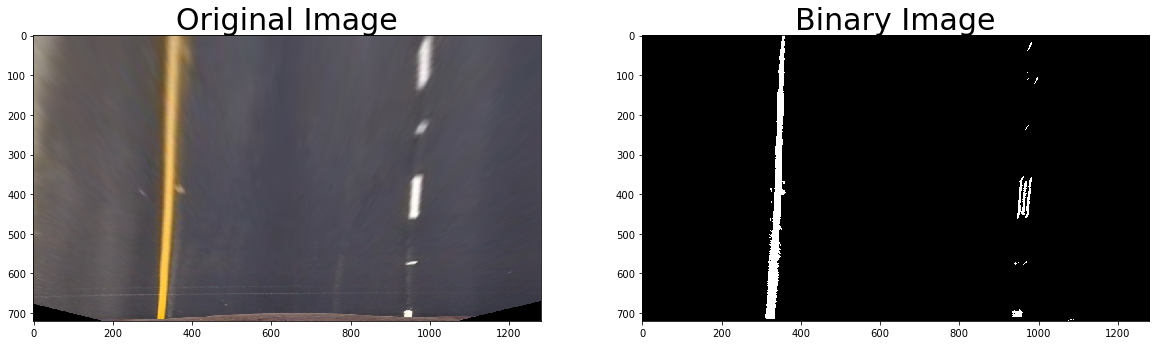

In [5]:
# warp the image after distortion correction
undistort_img = ih.undistort(image, mtx, dist)
warped, Minv = ih.warp(undistort_img)

# apply the combined threshold
binary_warped = ih.pipeline(warped, (130,255),(50,255),(40,255))
binary_warped = ih.region_of_interest(binary_warped)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(warped)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(binary_warped, cmap="gray")
ax2.set_title('Binary Image', fontsize=30)

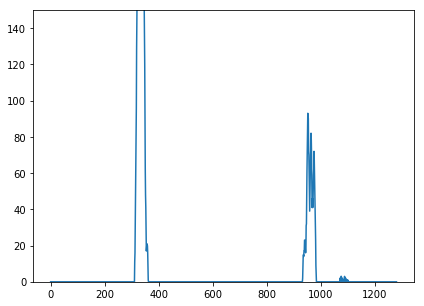

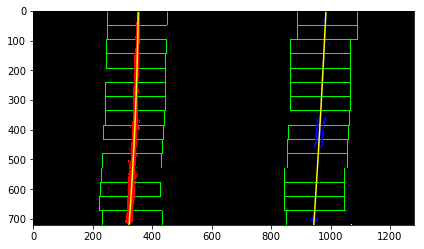

In [11]:
# fit polynomial
left_fit, right_fit, leftx, lefty, rightx, righty, ploty = ih.fit_polynomial(binary_warped, nwindows=15, plotit=True)

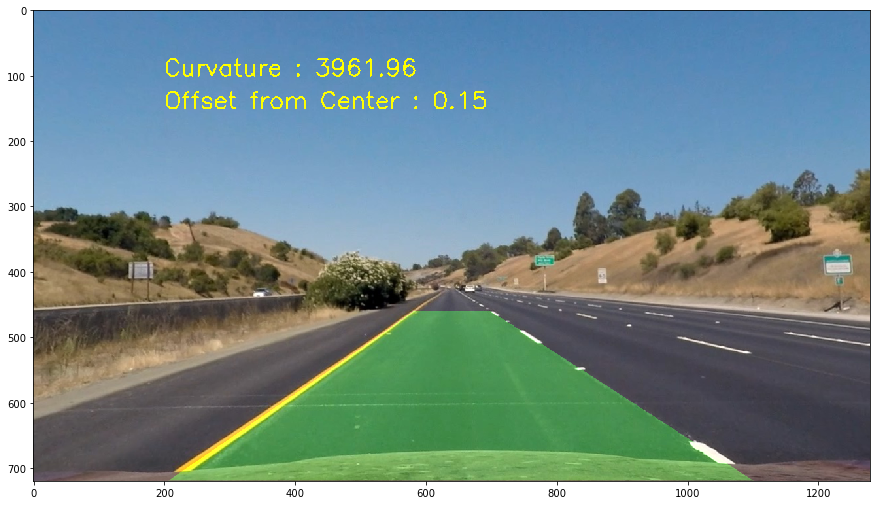

In [14]:
# draw lanes on the original image
output_image = ih.draw_lanes(undistort_img, binary_warped, left_fit, right_fit, ploty, Minv)

# Calculate curvature
left_curverad, right_curverad, offset_from_center = ih.calculate_curvature(output_image, leftx, lefty, rightx, righty)

# Add curvature to image
curvature_text = 'Curvature : {:.2f}'.format(curvature_in_m)
offset_text = 'Offset from Center : {:.2f}'.format(offset_from_center)
cv2.putText(output_image, curvature_text, (200, 100), 0, 1.2, (255, 255, 0), 2)
cv2.putText(output_image, offset_text, (200, 150), 0, 1.2, (255, 255, 0), 2)

plt.figure(figsize=(15,15))
plt.imshow(output_image)

In [15]:
mpimg.imsave("./examples/lane_detected.jpg", output_image)

In [9]:
mpimg.imsave("./examples/undistorted_straight_lines1.jpg", undistort_img)